# Natural Language Processing using NLTK

In [7]:
# Install NLTK - pip install nltk
import nltk
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /projects/0ddeade5-3577-4fe
[nltk_data]     8-8cd6-8a0cb653428e/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /projects/0ddeade5-3577-4fe8-
[nltk_data]     8cd6-8a0cb653428e/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## NLP Part 0 - Get some Data!

This section's code is mostly given to you as a review for how you can scrape and manipulate data from the web. 

In [8]:
import urllib
import bs4 as bs
import re

In [9]:
# We will read the contents of the Wikipedia article "Global_warming" as an example, please feel free to use your own! You can use the url below:
url = 'https://en.wikipedia.org/wiki/Global_warming' # you can change this to use other sites as well.

# We can open the page using "urllib.request.urlopen" then read it using ".read()"
source = urllib.request.urlopen(url).read()

# Beautiful Soup is a Python library for pulling data out of HTML and XML files.
# you may need to install a parser library --> "!pip3 install lxml"
# Parsing the data/creating BeautifulSoup object

soup = bs.BeautifulSoup(source,"html.parser") 

# Fetching the data
text = ""
for paragraph in soup.find_all('p'): #The <p> tag defines a paragraph in the webpages
    text += paragraph.text

# Preprocessing the data

text = re.sub(r'\[[0-9]*\]',' ',text) # [0-9]* --> Matches zero or more repetitions of any digit from 0 to 9
text = text.lower() #everything to lowercase
text = re.sub(r'\W^.?!',' ',text) # \W --> Matches any character which is not a word character except (.?!)
text = re.sub(r'\d',' ',text) # \d --> Matches any decimal digit
text = re.sub(r'\s+',' ',text) # \s --> Matches any characters that are considered whitespace (Ex: [\t\n\r\f\v].)

In [83]:
text[-100:]

'nge and land special report: the ocean and cryosphere in a changing climate sixth assessment report '

## NLP Part 1 - Tokenization of paragraphs/sentences

In this section we are going to tokenize our sentences and words. If you aren't familiar with tokenization, we recommend looking up "what is tokenization". 

You should also spend time on the [NLTK documentation](https://www.nltk.org/). If you're not sure how to do something, or get an error, it is best to google it first and ask questions as you go!



In [97]:
'''
Your code here: Tokenize the words from the data and set it to a variable called words.
Hint: how to this might be on the very home page of NLTK!
'''

import nltk
data = "Tokenize the words from the data and set it to a variable called words.\nHint: how to this might be on the very home page of NLTK!"
words = nltk.word_tokenize(text)

In [85]:
print(words[:10])

['contemporary', 'climate', 'change', 'includes', 'both', 'global', 'warming', 'and', 'its', 'impacts']


In [119]:
sentences = nltk.sent_tokenize(text)

In [87]:
print(sentences[:10])

[" contemporary climate change includes both global warming and its impacts on earth's weather patterns.", 'there have been previous periods of climate change, but the current changes are distinctly more rapid and not due to natural causes.', 'instead, they are caused by the emission of greenhouse gases, mostly carbon dioxide (co ) and methane.', 'burning fossil fuels for energy use creates most of these emissions.', 'certain agricultural practices, industrial processes, and forest loss are additional sources.', "greenhouse gases are transparent to sunlight, allowing it through to heat the earth's surface.", "when the earth emits that heat as infrared radiation the gases absorb it, trapping the heat near the earth's surface.", 'as the planet heats up it causes changes like the loss of sunlight-reflecting snow cover, amplifying global warming.', 'due to climate change, deserts are expanding, while heat waves and wildfires are becoming more common.', 'increased warming in the arctic has 

## NLP Part 2 - Stopwords and Punctuation
Now we are going to work to remove stopwords and punctuation from our data. Why do you think we are going to do this? Do some research if you don't know yet. 

In [56]:
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /projects/0ddeade5-3577-4
[nltk_data]     fe8-8cd6-8a0cb653428e/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [88]:
for i in range(len(sentences)):
    print(sentences[i])

 contemporary climate change includes both global warming and its impacts on earth's weather patterns.
there have been previous periods of climate change, but the current changes are distinctly more rapid and not due to natural causes.
instead, they are caused by the emission of greenhouse gases, mostly carbon dioxide (co ) and methane.
burning fossil fuels for energy use creates most of these emissions.
certain agricultural practices, industrial processes, and forest loss are additional sources.
greenhouse gases are transparent to sunlight, allowing it through to heat the earth's surface.
when the earth emits that heat as infrared radiation the gases absorb it, trapping the heat near the earth's surface.
as the planet heats up it causes changes like the loss of sunlight-reflecting snow cover, amplifying global warming.
due to climate change, deserts are expanding, while heat waves and wildfires are becoming more common.
increased warming in the arctic has contributed to melting permaf

In [57]:
'''
define a function called "remove_stopwords" that takes in a list of the sentences of the text and returns one that doesn't have any stopwords.
'''
# words = []
# for t in texts:
#     if t not in stopwords.words("english"):
#         words.append(t)
#words = [t for t in texts if t not in stopwords.words('english')]

def remove_stopwords(sentences):
    for i in range(len(sentences)):
        words = nltk.word_tokenize(sentences[i]) 
        words = [t for t in words if t not in stopwords.words('english')]
        sentences[i] = ' '.join(words)
    return sentences

###Then actually apply your function###
#removed_sentences = remove_stopwords(sentences)
#print(removed_sentences[:10]) #Check if it worked correctly. Are all stopwords removed?

In [29]:
'''
define a function called "remove_punctuation" that removes punctuation from the sentences.

'''
punct = ", . ? ! ( )"
punct = punct.split()

def remove_punctuation(sentences):
    for i in range(len(sentences)):
        words = nltk.word_tokenize(sentences[i]) 
        words = [t for t in words if t not in punct]
        sentences[i] = ' '.join(words)
    return sentences

#removed_sentences = remove_punctuation(sentences)
#print(removed_sentences[:10]) #eliminating all punctuation.

## NLP Part 3a - Stemming the words
Stemming is the process of reducing inflected (or sometimes derived) words to their word stem, base or root form. There is an example below!

In [40]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
# try each of the words below
#stemmer.stem('troubled')
#stemmer.stem('trouble')
#stemmer.stem('troubling')
stemmer.stem('though')

'though'

In [110]:
'''
Your code here:
Define a function called "stem_sentences" that takes in a list of sentences and returns a list of stemmed sentences.
'''
def stem_sentences(sentences):
    sentences = remove_stopwords(sentences)
    sentences = remove_punctuation(sentences)

    for i in range(len(sentences)):
        words = nltk.word_tokenize(sentences[i])
        words =[stemmer.stem(t) for t in words]
        sentences[i] = ' '.join(words)
    return sentences


In [113]:
stemmed_sentences = stem_sentences(sentences)
print(stemmed_sentences[:3])

["contemporari climat chang includ global warm impact earth 's weather pattern", 'previou period climat chang current chang distinctli rapid due natur cau', 'instead cau emiss greenhou gase mostli carbon dioxid co methan']


In [48]:
'''
Your code here:
Define a function called "stem_sentences" that takes in a list of sentences and returns a list of stemmed sentences.
'''
def stem_sentences(sentences):
    ### Some code goes here. Hint: Try looking up how to stem words in NLTK if you get stuck (or simply use the example above and run stemmer in a loop!). ###

SyntaxError: unexpected EOF while parsing (2096621504.py, line 6)

In [0]:
print(stemmed_sentences[:10])

## NLP Part 3b - Lemmatization

Lemmatization considers the context and converts the word to its meaningful base form. There is a cool tutorial and definition of lemmatization in NLTK [here](https://www.geeksforgeeks.org/python-lemmatization-with-nltk/).



In [120]:
from nltk.stem import WordNetLemmatizer
    
## Step 1: Import the lemmatizer
lemmatizer = WordNetLemmatizer()

def lem_sentences(sentences):
    
    for i in range(len(sentences)):
        words = nltk.word_tokenize(sentences[i])
        words =[lemmatizer.lemmatize(t) for t in words]
        sentences[i] = ' '.join(words)
    return sentences

lemmed_sentences = lem_sentences(sentences)
print(lemmed_sentences[:10]) 

["contemporary climate change includes both global warming and it impact on earth 's weather pattern .", 'there have been previous period of climate change , but the current change are distinctly more rapid and not due to natural cause .', 'instead , they are caused by the emission of greenhouse gas , mostly carbon dioxide ( co ) and methane .', 'burning fossil fuel for energy use creates most of these emission .', 'certain agricultural practice , industrial process , and forest loss are additional source .', "greenhouse gas are transparent to sunlight , allowing it through to heat the earth 's surface .", "when the earth emits that heat a infrared radiation the gas absorb it , trapping the heat near the earth 's surface .", 'a the planet heat up it cause change like the loss of sunlight-reflecting snow cover , amplifying global warming .', 'due to climate change , desert are expanding , while heat wave and wildfire are becoming more common .', 'increased warming in the arctic ha contr

In [116]:
print(sentences[:10]) 

["contemporary climate change includes both global warming and it impact on earth 's weather pattern .", 'there have been previous period of climate change , but the current change are distinctly more rapid and not due to natural cause .', 'instead , they are caused by the emission of greenhouse gas , mostly carbon dioxide ( co ) and methane .', 'burning fossil fuel for energy use creates most of these emission .', 'certain agricultural practice , industrial process , and forest loss are additional source .', "greenhouse gas are transparent to sunlight , allowing it through to heat the earth 's surface .", "when the earth emits that heat a infrared radiation the gas absorb it , trapping the heat near the earth 's surface .", 'a the planet heat up it cause change like the loss of sunlight-reflecting snow cover , amplifying global warming .', 'due to climate change , desert are expanding , while heat wave and wildfire are becoming more common .', 'increased warming in the arctic ha contr

## NLP Part 4 - POS Tagging

Parts of speech tagging is marking up a word in a text as corresponding to a particular part of speech, based on both its definition and its context.



In [17]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to /project
[nltk_data]     s/0ddeade5-3577-4fe8-8cd6-8a0cb653428e/nltk_data...


[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [126]:
# POS Tagging example
# CC - coordinating conjunction
# NN - noun, singular (cat, tree)
#all_words = nltk.word_tokenize(text)  ###If we want to look at part of speech taking before we stem/lem

all_words = nltk.word_tokenize(text)
tagged_words = nltk.pos_tag(all_words)

##Creates a list of lists where each element of the list is [word,partofspeech abbreviation]

# Tagged word paragraph
word_tags = []
for tw in tagged_words:
    word_tags.append(tw[0]+"_"+tw[1])

tagged_paragraph = ' '.join(word_tags)

'''
Your code here: print the first 1000 characters of tagged_paragraph.
'''
print(tagged_paragraph[:1000])

contemporary_JJ climate_NN change_NN includes_VBZ both_DT global_JJ warming_NN and_CC its_PRP$ impacts_NNS on_IN earth_NN 's_POS weather_NN patterns_NNS ._. there_EX have_VBP been_VBN previous_JJ periods_NNS of_IN climate_NN change_NN ,_, but_CC the_DT current_JJ changes_NNS are_VBP distinctly_RB more_RBR rapid_JJ and_CC not_RB due_JJ to_TO natural_JJ causes_NNS ._. instead_RB ,_, they_PRP are_VBP caused_VBN by_IN the_DT emission_NN of_IN greenhouse_NN gases_NNS ,_, mostly_RB carbon_NN dioxide_NN (_( co_NN )_) and_CC methane_NN ._. burning_VBG fossil_JJ fuels_NNS for_IN energy_NN use_NN creates_VBZ most_JJS of_IN these_DT emissions_NNS ._. certain_JJ agricultural_JJ practices_NNS ,_, industrial_JJ processes_NNS ,_, and_CC forest_JJS loss_NN are_VBP additional_JJ sources_NNS ._. greenhouse_NN gases_NNS are_VBP transparent_JJ to_TO sunlight_VB ,_, allowing_VBG it_PRP through_IN to_TO heat_VB the_DT earth_NN 's_POS surface_NN ._. when_WRB the_DT earth_NN emits_VBZ that_DT heat_NN as_IN in

# Word2Vec Model Visualization

In [3]:
# Install gensim - pip install gensim
import nltk
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
nltk.download('punkt')
from wordcloud import WordCloud

[nltk_data] Downloading package punkt to /projects/0ddeade5-3577-4fe8-
[nltk_data]     8cd6-8a0cb653428e/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [58]:
#Let's go ahead and create a list that's formatted how word2vec needs:
    # a list of lists where the ith entry in the list is the word tokenizaiton of the ith sentence (after preprocessing)


all_sentences = nltk.sent_tokenize(text)
all_sentences = remove_punctuation(all_sentences)
all_sentences = remove_stopwords(all_sentences)
for i in range(len(all_sentences)):
    all_sentences[i]  = [t for t in nltk.word_tokenize(all_sentences[i])]

In [59]:
# print the tokenized list of lists
all_sentences[:2]

[['contemporary',
  'climate',
  'change',
  'includes',
  'global',
  'warming',
  'impacts',
  'earth',
  "'s",
  'weather',
  'patterns'],
 ['previous',
  'periods',
  'climate',
  'change',
  'current',
  'changes',
  'distinctly',
  'rapid',
  'due',
  'natural',
  'causes']]

## Training the Word2Vec model

For this part you may want to follow a guide [here](https://radimrehurek.com/gensim/models/word2vec.html). 



In [60]:
''' Training the Word2Vec model. You should pass:
1. a list of lists where the ith entry in the list is the word tokenizaiton of the ith sentence
2. min_count=1 --> Ignores all words with total frequency lower than 1 (i.e., include everything).
'''

# model.wv.index_to_key
#create the model
model = Word2Vec(sentences=all_sentences, min_count=1)

common_words = model.wv.index_to_key

model.save("word2vec.model")
# model = Word2Vec.load("word2vec.model")

In [61]:
#print the first 10 most common words.
common_words[:10]

['climate',
 'change',
 'warming',
 'emissions',
 'global',
 'co',
 'energy',
 'greenhouse',
 'carbon',
 '°c']

In [24]:
# Look up the most similar words to certain words in your text using the model.wv.most_similar() function

In [63]:
most_similar = model.wv.most_similar('climate')

[('growth', 0.42760273814201355),
 ("'s", 0.3874661326408386),
 ('shown', 0.36687806248664856),
 ('heat', 0.3540138900279999),
 ('rise', 0.3379179835319519),
 ('greenhouse', 0.33700796961784363),
 ('vapour', 0.3274795711040497),
 ('become', 0.32398277521133423),
 ('ocean', 0.3222852945327759),
 ('adapt', 0.3180809020996094)]

## Testing our model

In [47]:
    # Finding Word Vectors - print word vectors for certain words in your text
print('climate')

climate


In [64]:
    ### Finding the most similar words in the model ###
most_similar

[('growth', 0.42760273814201355),
 ("'s", 0.3874661326408386),
 ('shown', 0.36687806248664856),
 ('heat', 0.3540138900279999),
 ('rise', 0.3379179835319519),
 ('greenhouse', 0.33700796961784363),
 ('vapour', 0.3274795711040497),
 ('become', 0.32398277521133423),
 ('ocean', 0.3222852945327759),
 ('adapt', 0.3180809020996094)]

<Figure size 432x288 with 0 Axes>

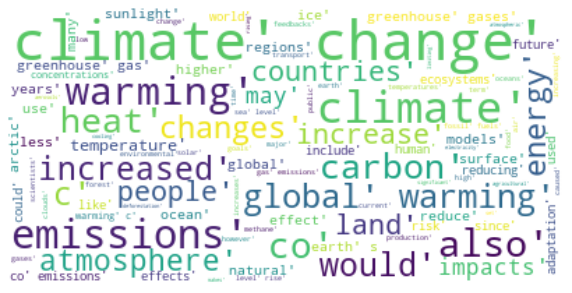

In [65]:
# code to print a wordcloud for your sentences
wordcloud = WordCloud(
                        background_color='white',
                        max_words=100,
                        max_font_size=50, 
                        random_state=42
                        ).generate(str(all_sentences))
fig = plt.figure(1)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

### Why did we do all this work?

In [66]:
# reFetching the data
lame_text = ""
for paragraph in soup.find_all('p'): #The <p> tag defines a paragraph in the webpages
    lame_text += paragraph.text

In [71]:
'''
Doing the same without removing stop words or lemming
'''
# tokenize the text using sent_tokenize
lame_sentences = nltk.sent_tokenize(lame_text)
# from this list of sentences, create a list of lists where the ith entry in the list is the word tokenizaiton of the ith sentence (after preprocessing)
for i in range(len(lame_sentences)):
    lame_sentences[i]  = [t for t in nltk.word_tokenize(lame_sentences[i])]

<Figure size 432x288 with 0 Axes>

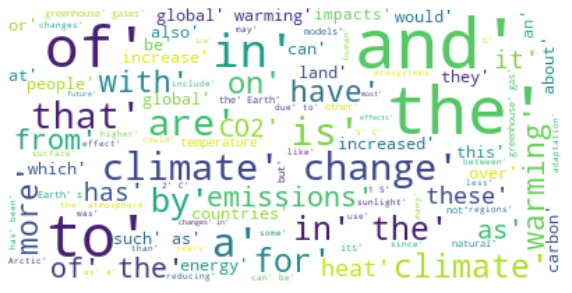

In [72]:
# Redo the word cloud but set stopwords to empty so it looks really bad
wordcloud = WordCloud(
                        background_color='white',
                        max_words=100,
                        max_font_size=50, 
                        random_state=42, ###SET STOPWORDS = [] and/or include_numbers = True or you will get the same thing!!!
                        stopwords = [],
                        include_numbers = True).generate(str(lame_sentences)) 
fig = plt.figure(1)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [73]:
# Training the Word2Vec model (same code as before), but one change: use our lame data that was not preprocessed

model2 = Word2Vec(sentences=lame_sentences, min_count=1)
common_words = model2.wv.index_to_key
model2.save("word2vec.model")

# Try printing this after training the model.
lame_words = model2.wv.index_to_key
print(lame_words[:10])

['.', ',', 'the', ']', '[', 'and', 'of', 'to', 'in', 'climate']


In [79]:
# Finding a vector of a word, but badly
vector = 
print()

[-0.10725]


In [74]:
### Finding the most similar words in the model but... you get the idea ###
lame_most_similar = model2.wv.most_similar('climate')
print(lame_most_similar[:10])

[('the', 0.9990245699882507), ('.', 0.9989960193634033), (',', 0.9989680647850037), ('to', 0.9989367723464966), ('of', 0.9989364743232727), ('in', 0.9988916516304016), ('and', 0.9988330006599426), ('is', 0.998696506023407), ('a', 0.9986574053764343), ('[', 0.9985697269439697)]


## Reflection

How important do you think proper preprocessing in NLP is?

